In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('E://EXCELR//Data science//Data science assignment//13) KNN//zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.shape

(101, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [7]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

<AxesSubplot:>

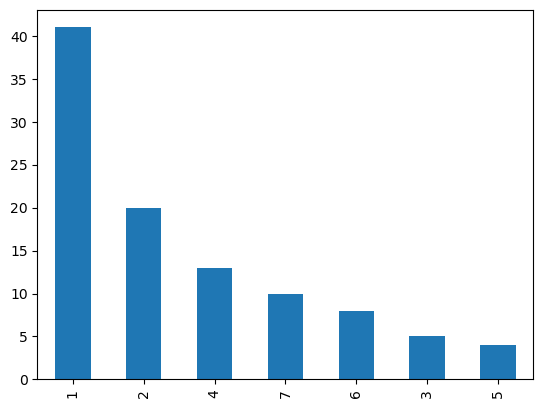

In [10]:
df['type'].value_counts().plot.bar()

In [11]:
## dropping animal name column
df.drop('animal name',axis=1,inplace=True)

In [12]:
df.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# creating base model of KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [14]:
arr=df.values
X=arr[:,:-1]
Y=arr[:,-1]

In [15]:
Y=Y.astype('int') 

In [16]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2])

In [17]:
# checking target type
from sklearn.utils.multiclass import type_of_target
type_of_target(Y)

'multiclass'

In [18]:
# Defining base model
model=KNeighborsClassifier(n_neighbors = 5)

# model evaluation method
cv1= StratifiedKFold(n_splits=5,shuffle=True, random_state=None)

# evaluate model
scores = cross_val_score(model, X, Y, scoring='recall_micro', cv=cv1, n_jobs=-1)

# Mean accuracy
print("The mean recall for base model is:",np.mean(scores))

C:\Users\91771\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


The mean recall for base model is: 0.8414285714285714


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=10)

In [20]:
## Fitting the model and making predictions

knn1= KNeighborsClassifier(n_neighbors=4)
knn1.fit(X_train,Y_train)
pred1=knn1.predict(X_test)

C:\Users\91771\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, pred1))

              precision    recall  f1-score   support

           1       0.91      0.83      0.87        12
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.67      1.00      0.80         4
           5       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         2
           7       1.00      0.75      0.86         4

    accuracy                           0.84        31
   macro avg       0.70      0.80      0.72        31
weighted avg       0.84      0.84      0.82        31



C:\Users\91771\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91771\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91771\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix


conf_matrix1=confusion_matrix(Y_test, pred1)
conf_matrix1

array([[10,  0,  0,  2,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  1,  0,  3]], dtype=int64)


# Comparing training and testing set accuracy with different n_neighbors values

C:\Users\91771\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\91771\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

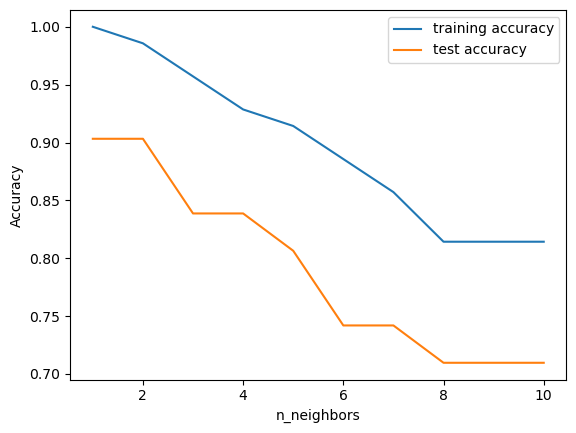

In [24]:
train_accuracy=[]
test_accuracy=[]
i=range(1,11)

for n_neighbors in i:
    
    knn2=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn2.fit(X_train,Y_train)
    
    score_train=knn2.score(X_train,Y_train)
    score_test=knn2.score(X_test,Y_test)
    
    train_accuracy.append(score_train)
    test_accuracy.append(score_test)
    
plt.plot(i, train_accuracy, label="training accuracy")
plt.plot(i, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Parameter Tuning using GridSearchCV


In [25]:
## parameters of base model
knn1.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

In [26]:
from sklearn.model_selection import GridSearchCV

new_params={'n_neighbors':[x for x in range(4,16)],
            'metric':['canberra','euclidean','minkowski']}

knn_grid=GridSearchCV(knn1,param_grid = new_params, cv =cv1,scoring='recall_micro', n_jobs = -1, verbose = 2)

knn_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\91771\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(n_neighbors=4), n_jobs=-1,
             param_grid={'metric': ['canberra', 'euclidean', 'minkowski'],
                         'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                         15]},
             scoring='recall_micro', verbose=2)

In [27]:

# Finding best parameter after tuning 

print("Best score for GridSearchCV is:",knn_grid.best_score_)
print("Optimal parameters for GridSearchCV is:",knn_grid.best_params_)

Best score for GridSearchCV is: 0.9142857142857143
Optimal parameters for GridSearchCV is: {'metric': 'canberra', 'n_neighbors': 4}


In [28]:
## storing the best parameters in a variable
## fitting the model with best parameters

d1= knn_grid.best_params_

knn3=KNeighborsClassifier(n_neighbors=d1['n_neighbors'],metric=d1['metric'])
knn3.fit(X_train,Y_train)

pred3=knn3.predict(X_test)

C:\Users\91771\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
print(classification_report(Y_test, pred3))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91        12
           2       0.86      1.00      0.92         6
           3       1.00      0.50      0.67         2
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.75      0.86         4

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.85        31
weighted avg       0.91      0.87      0.87        31



In [30]:
conf_matrix2=confusion_matrix(Y_test, pred3)
conf_matrix2

array([[10,  0,  0,  2,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  1,  3]], dtype=int64)

# Plotting confusion matrices of base model and tuned model


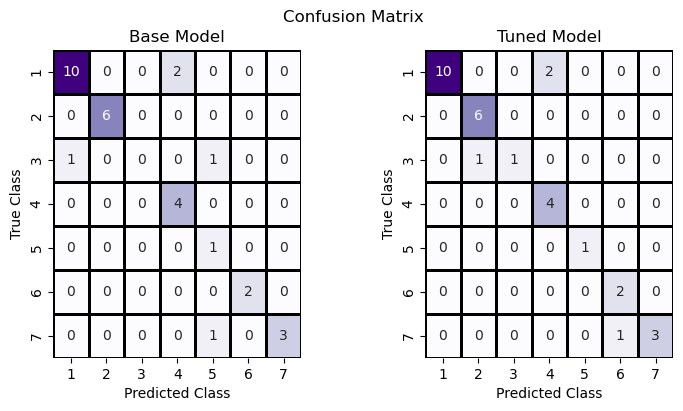

In [31]:
fig, ax= plt.subplots(1,2, figsize=(8,4),dpi=100)

xlabels=[1,2,3,4,5,6,7]
ylabels=[1,2,3,4,5,6,7]

sns.heatmap(conf_matrix1,ax=ax[0],annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax[0].set_title('Base Model')

sns.heatmap(conf_matrix2,ax=ax[1],annot=True, cbar=None, cmap="Purples",xticklabels=xlabels,yticklabels=ylabels,
            linewidths=1,linecolor='black')
ax[1].set_title('Tuned Model')

ax[0].set_xlabel('Predicted Class')
ax[0].set_ylabel('True Class')

ax[1].set_xlabel('Predicted Class')
ax[1].set_ylabel('True Class')

fig.suptitle("Confusion Matrix")
plt.subplots_adjust(wspace=0.5)

plt.show()